<a href="https://colab.research.google.com/github/yangsungsu/web1/blob/master/%EA%B3%B5%EC%82%AC%EB%B9%84_%EB%B6%84%EC%84%9D_V10(%EB%B3%80%EC%88%98_%EC%B6%94%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import model_selection, svm, metrics

import numpy as np
import pandas as pd
%config InlineBackend.figure_format = 'retina'

In [3]:
import os, os.path, shutil
if not os.path.exists("./data"):
    os.makedirs("./data")

In [4]:
!pip install xlrd

In [5]:
contract_data = pd.read_excel('data/contract.xlsx')

In [6]:
print(contract_data.shape)

(51736, 16)


In [7]:
print(contract_data.공사비구분.value_counts())

1  표준시설부담금      25844
3  설계조정시설부담금    14174
2  설계시설부담금      11718
Name: 공사비구분, dtype: int64


In [8]:
cd = contract_data

cd = cd.set_index('공사비구분')

In [9]:
features1 = ["접수종류", "공사형태", "고객부담금", "계약종별", "공급방식",
                 "계약전력", "저고압구분", "계약방법", "공동이용구분", "자가용구분",
            "선택요금코드", "가공지중구분", 
                 "공정유형코드", "전기사용용도코드", "시간적용제외코드"]

In [10]:
x = cd[features1]


In [11]:
x

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,29-공급지점변경,2 외선소요,845893,223 교육용(갑)고압A,840 삼상4선(22.9kV-y),600,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,지중,02 가공외선공사,10 기타공공용,6 고압 계약전력초과 적용
51732,23-계약종별변경증설,1 외선불요,1083899,211 일반용(갑)저압,738 삼상4선(220/380V),18,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용
51733,29-공급지점변경,1 외선불요,3356444,726 산업용(을)고압A,840 삼상4선(22.9kV-y),950,2 고압,2 고압수전설비계약,5 공동이용아님,1 자가용,2 선택요금2,가공,02 가공외선공사,02 상업용,6 고압 계약전력초과 적용
51734,21-증설,1 외선불요,478000,211 일반용(갑)저압,738 삼상4선(220/380V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,02 상업용,1 450시간 적용


In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   접수종류      51736 non-null  object
 1   공사형태      51736 non-null  object
 2   고객부담금     51736 non-null  int64 
 3   계약종별      51736 non-null  object
 4   공급방식      51736 non-null  object
 5   계약전력      51736 non-null  int64 
 6   저고압구분     51736 non-null  object
 7   계약방법      51736 non-null  object
 8   공동이용구분    51736 non-null  object
 9   자가용구분     51736 non-null  object
 10  선택요금코드    51736 non-null  object
 11  가공지중구분    47416 non-null  object
 12  공정유형코드    43869 non-null  object
 13  전기사용용도코드  51736 non-null  object
 14  시간적용제외코드  51736 non-null  object
dtypes: int64(2), object(13)
memory usage: 5.9+ MB


contract = contract_data.set_index('공사비구분')

In [13]:
y = cd["공사비구분"]
print(y.shape)
y.head()

(51736,)


0    1  표준시설부담금
1    1  표준시설부담금
2    1  표준시설부담금
3    1  표준시설부담금
4    1  표준시설부담금
Name: 공사비구분, dtype: object

In [14]:
y = pd.DataFrame(y)

In [15]:
y

,공사비구분
0,1 표준시설부담금
1,1 표준시설부담금
2,1 표준시설부담금
3,1 표준시설부담금
4,1 표준시설부담금
...,...
51731,3 설계조정시설부담금
51732,3 설계조정시설부담금
51733,3 설계조정시설부담금
51734,3 설계조정시설부담금


** X 데이터 전처리 - 문자 숫자 변경**

In [16]:
x_add = pd.get_dummies(x[features1])

In [17]:
new_x = pd.concat([x, x_add], axis=1); new_x.head()

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드,고객부담금,계약전력,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,172000,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용,4900000,145,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용,1854000,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,258000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,430000,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [18]:
new_x.drop(x[features1], axis=1, inplace=True)

In [19]:
new_x

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,공동이용구분_1 모수용,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


데이터 전처리 - 카테고리를 숫자로 변환 (열의 유향을 먼저 변경)
계열을 정수 식별자로 변환하기를 원하면 pd.factorize를 사용 가능 

In [20]:
y = y.replace({'공사비구분': '1표준시설부담금, 2설계시설부담금, 3설계조정시설부담금'}, {'공사비구분': '0,1,2'})

In [21]:
y.공사비구분 = pd.Categorical(y.공사비구분)

In [22]:
y['공사비구분_code'] = y.공사비구분.cat.codes

In [23]:
y

,공사비구분,공사비구분_code
0,1 표준시설부담금,0
1,1 표준시설부담금,0
2,1 표준시설부담금,0
3,1 표준시설부담금,0
4,1 표준시설부담금,0
...,...,...
51731,3 설계조정시설부담금,2
51732,3 설계조정시설부담금,2
51733,3 설계조정시설부담금,2
51734,3 설계조정시설부담금,2


In [24]:
y.drop(['공사비구분'], axis='columns', inplace=True)

In [25]:
y

,공사비구분_code
0,0
1,0
2,0
3,0
4,0
...,...
51731,2
51732,2
51733,2
51734,2


In [26]:
print(y.공사비구분_code.value_counts())

0    25844
2    14174
1    11718
Name: 공사비구분_code, dtype: int64


In [ ]:
#공사비구분 = pd.get_dummies(y, prefix='공사비구분_')

In [ ]:
#new_y = pd.concat([y, 공사비구분], axis=1); new_y.head()

In [ ]:
#y = new_y

In [ ]:
#y = new_y.drop('공사비구분', axis=1, inplace=True)

new_x.drop('접수종류', '공사형태', '계약종별', '공급방식', '저고압구분', '계약방법', '공동이용구분', '자가용구분', '선택요금코드', '가공지중구분', '공정유형코드', '전기사용용도코드', '시간적용제외코드', axis=1, inplace=True)

x, y의 컬럼 합친 후 특성 타켓 구분 후 결정트리 만들기

결정트리 분류

In [27]:
cd = pd.concat([new_x, y], axis=1); cd

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,공동이용구분_2 자수용,공동이용구분_4 모자대상제외,공동이용구분_5 공동이용아님,자가용구분_1 자가용,자가용구분_2 비자가용,선택요금코드_0 대상아님,선택요금코드_1 선택요금1,선택요금코드_2 선택요금2,선택요금코드_3 선택요금3,선택요금코드_4 선택요금4,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용,공사비구분_code
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2


In [28]:
feature_names = cd.columns.tolist()

In [29]:
feature_names = feature_names[0:101]

In [30]:
feature_names

['접수종류_11-신설(상용/임시)',
 '접수종류_14-신,증설(예비전력)',
 '접수종류_18-해지후재사용(신규)',
 '접수종류_1C-신설(발전기)',
 '접수종류_1D-증설(발전기)',
 '접수종류_21-증설',
 '접수종류_22-공급방식변경증설',
 '접수종류_23-계약종별변경증설',
 '접수종류_24-일부해지(신규)',
 '접수종류_25-계약단위분할',
 '접수종류_26-계약단위합병',
 '접수종류_28-단순공급방식변경',
 '접수종류_29-공급지점변경',
 '공사형태_0',
 '공사형태_1 외선불요',
 '공사형태_2 외선소요',
 '공사형태_3 외선소요(선공급)',
 '계약종별_100 주택용전력',
 '계약종별_108 임시전력(갑)',
 '계약종별_211 일반용(갑)저압',
 '계약종별_213 교육용(갑)저압',
 '계약종별_218 임시전력(을)저압',
 '계약종별_221 일반용(갑)I고압A',
 '계약종별_222 일반용(갑)II고압A',
 '계약종별_223 교육용(갑)고압A',
 '계약종별_226 일반용(을)고압A',
 '계약종별_228 임시전력(을)고압A',
 '계약종별_311 산업용(갑)저압',
 '계약종별_321 산업용(갑)I고압A',
 '계약종별_322 산업용(갑)II고압A',
 '계약종별_410 농사용(갑)',
 '계약종별_430 농사용(을)저압',
 '계약종별_431 농사용(을)고압A',
 '계약종별_526 교육용(을)고압A',
 '계약종별_600 가로등(갑)',
 '계약종별_610 가로등(을)',
 '계약종별_726 산업용(을)고압A',
 '계약종별_736 산업용(을)고압B',
 '계약종별_905 심야전력(갑)',
 '공급방식_320 단상2선(200V)',
 '공급방식_322 단상2선(220V)',
 '공급방식_638 삼상3선(380V)',
 '공급방식_738 삼상4선(220/380V)',
 '공급방식_790 삼상3선(6.6kV)',
 '공급방식_840 삼상4선(22.9kV-y)',
 '공급방식_850 삼상3선(22kV)',
 '공

In [31]:
target_name = np.array(['standard', 'design', 'revison'])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(new_x, y, test_size = 0.2)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model = DecisionTreeClassifier(max_depth=20)

In [99]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8661577116350986

In [36]:
!pip install graphviz

In [37]:
from sklearn.tree import export_graphviz
import graphviz
export_graphviz(
    model,
    out_file = "./contract.dot",
    feature_names = new_x.columns,
    class_names = target_name,
    filled = True
    )

In [38]:
with open("contract.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [39]:
list(zip(x.columns, model.feature_importances_.round(3)))

[('접수종류', 0.052),
 ('공사형태', 0.006),
 ('고객부담금', 0.007),
 ('계약종별', 0.049),
 ('공급방식', 0.0),
 ('계약전력', 0.005),
 ('저고압구분', 0.002),
 ('계약방법', 0.002),
 ('공동이용구분', 0.001),
 ('자가용구분', 0.0),
 ('선택요금코드', 0.0),
 ('가공지중구분', 0.001),
 ('공정유형코드', 0.008),
 ('전기사용용도코드', 0.101),
 ('시간적용제외코드', 0.002)]

In [40]:
cd_importance = pd.DataFrame({'feature':new_x.columns,'importance':model.feature_importances_ })

In [41]:
cd_importance

,feature,importance
0,접수종류_11-신설(상용/임시),0.052212
1,"접수종류_14-신,증설(예비전력)",0.006046
2,접수종류_18-해지후재사용(신규),0.007162
3,접수종류_1C-신설(발전기),0.049277
4,접수종류_1D-증설(발전기),0.000074
...,...,...
97,시간적용제외코드_0 제외대상,0.001287
98,시간적용제외코드_1 450시간 적용,0.004611
99,시간적용제외코드_2 720시간 적용,0.002026
100,시간적용제외코드_5 저압 계약전력초과 적용,0.003895


In [42]:
cd_importance = cd_importance.sort_values('importance', ascending=False) 
print(cd_importance.head(20))

                     feature  importance
76           공정유형코드_01 인입선공사    0.285320
13                    공사형태_0    0.100943
74                 가공지중구분_지중    0.081552
21        계약종별_218 임시전력(을)저압    0.075967
26       계약종별_228 임시전력(을)고압A    0.071629
73                 가공지중구분_가공    0.056860
0          접수종류_11-신설(상용/임시)    0.052212
3            접수종류_1C-신설(발전기)    0.049277
51             계약방법_0 저압일반계약    0.049245
101  시간적용제외코드_6 고압 계약전력초과 적용    0.041701
53           계약방법_2 고압수전설비계약    0.010486
17            계약종별_100 주택용전력    0.010247
19         계약종별_211 일반용(갑)저압    0.008048
12            접수종류_29-공급지점변경    0.007870
2         접수종류_18-해지후재사용(신규)    0.007162
1         접수종류_14-신,증설(예비전력)    0.006046
5                 접수종류_21-증설    0.004966
18          계약종별_108 임시전력(갑)    0.004913
86          전기사용용도코드_09 광공업용    0.004817
98       시간적용제외코드_1 450시간 적용    0.004611


In [43]:
cdi = cd_importance

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46300 missing from current font.
  font.set_

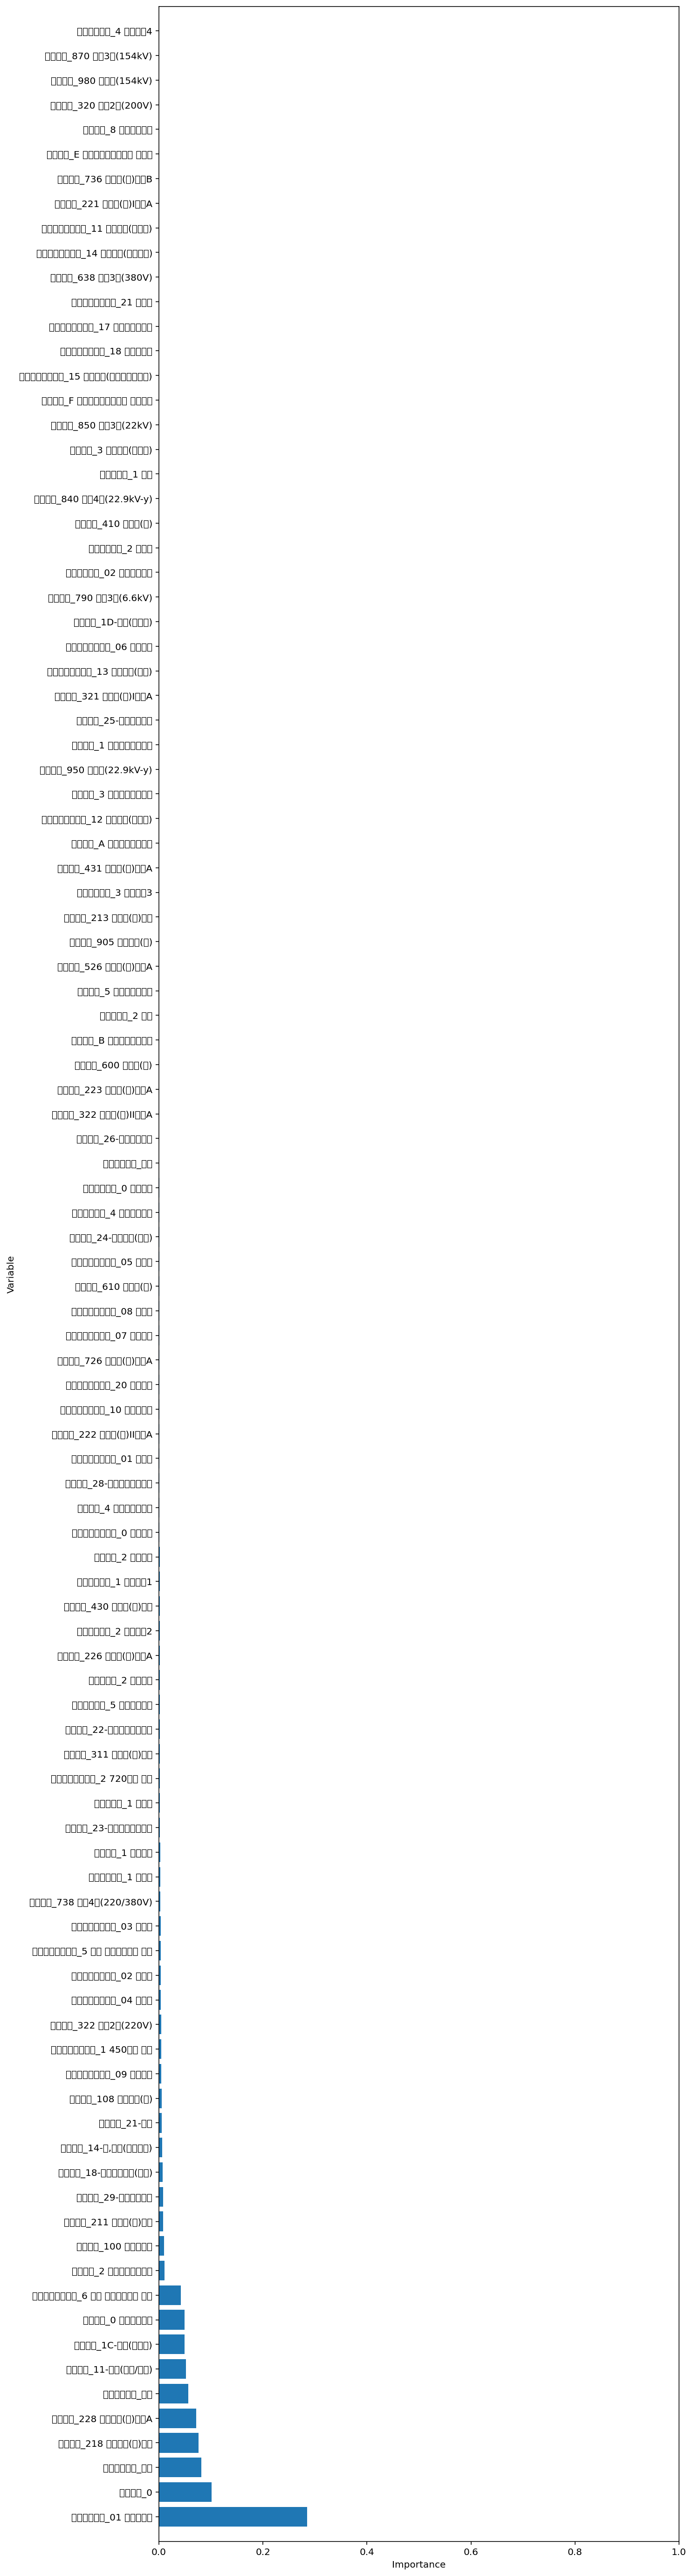

In [44]:
x = cdi.feature
y = cdi.importance
ypos = np.arange(len(x))
plt.figure(figsize=(10,50)) 
plt.barh(x, y) 
plt.yticks(ypos, x) 
plt.xlabel('Importance') 
plt.ylabel('Variable') 
plt.xlim(0, 1) 
plt.ylim(-1, len(x)) 
plt.show()

![대체 텍스트](https://)

랜덤 포레스트 분류 

In [98]:
model_rfc = RandomForestClassifier(n_estimators= 500)
model_rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8663509856977194

In [46]:
cdr_importance = pd.DataFrame({'feature':new_x,'importance':model_rfc.feature_importances_ })

In [47]:
cdr_importance

,feature,importance
0,"(접, 수, 종, 류, _, 1, 1, -, 신, 설, (, 상, 용, /, 임, ...",0.036765
1,"(접, 수, 종, 류, _, 1, 4, -, 신, ,, 증, 설, (, 예, 비, ...",0.004090
2,"(접, 수, 종, 류, _, 1, 8, -, 해, 지, 후, 재, 사, 용, (, ...",0.013842
3,"(접, 수, 종, 류, _, 1, C, -, 신, 설, (, 발, 전, 기, ))",0.075978
4,"(접, 수, 종, 류, _, 1, D, -, 증, 설, (, 발, 전, 기, ))",0.000090
...,...,...
97,"(시, 간, 적, 용, 제, 외, 코, 드, _, 0, , 제, 외, 대, 상)",0.008384
98,"(시, 간, 적, 용, 제, 외, 코, 드, _, 1, , 4, 5, 0, 시, ...",0.010251
99,"(시, 간, 적, 용, 제, 외, 코, 드, _, 2, , 7, 2, 0, 시, ...",0.001461
100,"(시, 간, 적, 용, 제, 외, 코, 드, _, 5, , 저, 압, , 계, ...",0.009234


In [48]:
cdr_importance = cdr_importance.sort_values('importance', ascending=False) 


In [49]:
print(cdr_importance.head(20))

                                              feature  importance
76      (공, 정, 유, 형, 코, 드, _, 0, 1,  , 인, 입, 선, 공, 사)    0.098230
3       (접, 수, 종, 류, _, 1, C, -, 신, 설, (, 발, 전, 기, ))    0.075978
73                        (가, 공, 지, 중, 구, 분, _, 가, 공)    0.061149
14                  (공, 사, 형, 태, _, 1,  , 외, 선, 불, 요)    0.060121
13                                 (공, 사, 형, 태, _, 0)    0.051937
21  (계, 약, 종, 별, _, 2, 1, 8,  , 임, 시, 전, 력, (, 을, ...    0.047286
74                        (가, 공, 지, 중, 구, 분, _, 지, 중)    0.038347
0   (접, 수, 종, 류, _, 1, 1, -, 신, 설, (, 상, 용, /, 임, ...    0.036765
19  (계, 약, 종, 별, _, 2, 1, 1,  , 일, 반, 용, (, 갑, ), ...    0.035467
15                  (공, 사, 형, 태, _, 2,  , 외, 선, 소, 요)    0.035255
51            (계, 약, 방, 법, _, 0,  , 저, 압, 일, 반, 계, 약)    0.033572
77   (공, 정, 유, 형, 코, 드, _, 0, 2,  , 가, 공, 외, 선, 공, 사)    0.030666
26  (계, 약, 종, 별, _, 2, 2, 8,  , 임, 시, 전, 력, (, 을, ...    0.028344
34      (계, 약, 종, 별, _, 6, 0, 0,  , 가, 로, 등, (, 갑, ))    0.024028
17        

# 선형 모델(확률적 경사 하강법 사용)

In [50]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [51]:
from sklearn.linear_model import SGDClassifier, LogisticRegression

In [52]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8513722458446077

분류성능 비교

In [53]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[4525,   14,  583],
       [ 253, 1816,  330],
       [ 167,  191, 2469]])

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5122
           1       0.90      0.76      0.82      2399
           2       0.73      0.87      0.80      2827

    accuracy                           0.85     10348
   macro avg       0.85      0.84      0.84     10348
weighted avg       0.86      0.85      0.85     10348



동적성능평가

In [55]:
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

Support Vector Classifier (SVC)

In [57]:
from sklearn.svm import SVC 

In [58]:
svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8751449555469656

변수 추가

In [60]:
Raw_data = pd.read_excel('data/Raw_data.xlsx')

In [61]:
print(Raw_data.shape)

(51736, 35)


In [62]:
RD = Raw_data

In [ ]:
RD

In [65]:
RD.isnull().sum()

접수상태                0
접수종류                0
공사비구분               0
공사유형                0
공사형태                0
고객부담금               0
계약종별                0
공급방식                0
계약전력                0
저고압구분               0
계약방법                0
공동이용구분              0
자가용구분               0
대용량고객종류             0
선택요금코드              0
설비변압기전압         47846
가공지중구분           4320
사용설비구분코드        41800
사용설비종류코드        41800
공정유형코드           7867
전기사용용도코드            0
산업분류코드              0
시간적용제외코드            0
부하조정제외여부        45721
다계기운전구분코드           0
주거구분코드              0
비주거유형코드             0
공동이용구분코드            0
모자유형코드          50109
발전기설치구분코드       43331
발전원구분코드         43331
총설비투자액          51709
주파수             43705
변압기 사용설비종류코드    47035
변압기용량           47035
dtype: int64

Null 합계가 작은 가공지중구분, 공정유형코드에 대한 변수 집어넣기

In [66]:
features2 = ["접수종류", "공사형태", "고객부담금", "계약종별", "공급방식",
                 "계약전력", "저고압구분", "계약방법", "공동이용구분", "자가용구분",
            "선택요금코드", "가공지중구분", 
                 "공정유형코드", "전기사용용도코드", "시간적용제외코드","가공지중구분", "공정유형코드"]

In [69]:
x2 = RD[features2]

In [70]:
x2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51736 entries, 0 to 51735
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   접수종류      51736 non-null  object
 1   공사형태      51736 non-null  object
 2   고객부담금     51736 non-null  int64 
 3   계약종별      51736 non-null  object
 4   공급방식      51736 non-null  object
 5   계약전력      51736 non-null  int64 
 6   저고압구분     51736 non-null  object
 7   계약방법      51736 non-null  object
 8   공동이용구분    51736 non-null  object
 9   자가용구분     51736 non-null  object
 10  선택요금코드    51736 non-null  object
 11  가공지중구분    47416 non-null  object
 12  공정유형코드    43869 non-null  object
 13  전기사용용도코드  51736 non-null  object
 14  시간적용제외코드  51736 non-null  object
 15  가공지중구분    47416 non-null  object
 16  공정유형코드    43869 non-null  object
dtypes: int64(2), object(15)
memory usage: 6.7+ MB


In [73]:
y = RD["공사비구분"]
print(y.shape)
y.head()

(51736,)


0    1  표준시설부담금
1    1  표준시설부담금
2    1  표준시설부담금
3    1  표준시설부담금
4    1  표준시설부담금
Name: 공사비구분, dtype: object

In [74]:
y = pd.DataFrame(y)

In [75]:
x_add2 = pd.get_dummies(x2[features2])

In [76]:
new_x2 = pd.concat([x2, x_add2], axis=1); new_x2.head()

,접수종류,공사형태,고객부담금,계약종별,공급방식,계약전력,저고압구분,계약방법,공동이용구분,자가용구분,선택요금코드,가공지중구분,공정유형코드,전기사용용도코드,시간적용제외코드,가공지중구분,공정유형코드,고객부담금,계약전력,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,...,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사
0,22-공급방식변경증설,1 외선불요,172000,211 일반용(갑)저압,738 삼상4선(220/380V),10,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,가공,01 인입선공사,172000,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
1,21-증설,2 외선소요,4900000,211 일반용(갑)저압,738 삼상4선(220/380V),145,1 저압,0 저압일반계약,5 공동이용아님,1 자가용,0 대상아님,지중,02 가공외선공사,02 상업용,1 450시간 적용,지중,02 가공외선공사,4900000,145,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
2,11-신설(상용/임시),1 외선불요,1854000,610 가로등(을),738 삼상4선(220/380V),24,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,02 가공외선공사,08 가로등,5 저압 계약전력초과 적용,가공,02 가공외선공사,1854000,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1
3,23-계약종별변경증설,1 외선불요,258000,211 일반용(갑)저압,322 단상2선(220V),8,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,가공,01 인입선공사,258000,8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,22-공급방식변경증설,1 외선불요,430000,211 일반용(갑)저압,738 삼상4선(220/380V),15,1 저압,0 저압일반계약,5 공동이용아님,2 비자가용,0 대상아님,가공,01 인입선공사,02 상업용,1 450시간 적용,가공,01 인입선공사,430000,15,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0


In [77]:
new_x2.drop(x2[features2], axis=1, inplace=True)

In [78]:
new_x2

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1


In [79]:
y = y.replace({'공사비구분': '1표준시설부담금, 2설계시설부담금, 3설계조정시설부담금'}, {'공사비구분': '0,1,2'})

In [80]:
y.공사비구분 = pd.Categorical(y.공사비구분)

In [81]:
y['공사비구분_code'] = y.공사비구분.cat.codes

In [83]:
y.drop(['공사비구분'], axis='columns', inplace=True)

In [84]:
cd2 = pd.concat([new_x2, y], axis=1); cd2

,접수종류_11-신설(상용/임시),"접수종류_14-신,증설(예비전력)",접수종류_18-해지후재사용(신규),접수종류_1C-신설(발전기),접수종류_1D-증설(발전기),접수종류_21-증설,접수종류_22-공급방식변경증설,접수종류_23-계약종별변경증설,접수종류_24-일부해지(신규),접수종류_25-계약단위분할,접수종류_26-계약단위합병,접수종류_28-단순공급방식변경,접수종류_29-공급지점변경,공사형태_0,공사형태_1 외선불요,공사형태_2 외선소요,공사형태_3 외선소요(선공급),계약종별_100 주택용전력,계약종별_108 임시전력(갑),계약종별_211 일반용(갑)저압,계약종별_213 교육용(갑)저압,계약종별_218 임시전력(을)저압,계약종별_221 일반용(갑)I고압A,계약종별_222 일반용(갑)II고압A,계약종별_223 교육용(갑)고압A,계약종별_226 일반용(을)고압A,계약종별_228 임시전력(을)고압A,계약종별_311 산업용(갑)저압,계약종별_321 산업용(갑)I고압A,계약종별_322 산업용(갑)II고압A,계약종별_410 농사용(갑),계약종별_430 농사용(을)저압,계약종별_431 농사용(을)고압A,계약종별_526 교육용(을)고압A,계약종별_600 가로등(갑),계약종별_610 가로등(을),계약종별_726 산업용(을)고압A,계약종별_736 산업용(을)고압B,계약종별_905 심야전력(갑),공급방식_320 단상2선(200V),...,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,전기사용용도코드_01 주거용,전기사용용도코드_02 상업용,전기사용용도코드_03 관공용,전기사용용도코드_04 농사용,전기사용용도코드_05 국군용,전기사용용도코드_06 유엔군용,전기사용용도코드_07 아파트용,전기사용용도코드_08 가로등,전기사용용도코드_09 광공업용,전기사용용도코드_10 기타공공용,전기사용용도코드_11 사업자용(사무실),전기사용용도코드_12 사업자용(건설용),전기사용용도코드_13 사업자용(기타),전기사용용도코드_14 사업자용(변전소용),전기사용용도코드_15 사업자용(발전소기동전력),전기사용용도코드_17 종합계약아파트,전기사용용도코드_18 소형열병합,전기사용용도코드_20 연립주택,전기사용용도코드_21 융설용,시간적용제외코드_0 제외대상,시간적용제외코드_1 450시간 적용,시간적용제외코드_2 720시간 적용,시간적용제외코드_5 저압 계약전력초과 적용,시간적용제외코드_6 고압 계약전력초과 적용,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,가공지중구분_가공,가공지중구분_지중,가공지중구분_혼재,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공정유형코드_01 인입선공사,공정유형코드_02 가공외선공사,공사비구분_code
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51731,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,2
51732,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,2
51733,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,2
51734,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,2


In [85]:
feature_names2 = cd2.columns.tolist()

In [86]:
feature_names2 = feature_names2[0:116]

In [87]:
target_name = np.array(['standard', 'design', 'revison'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(new_x2, y, test_size = 0.2)

In [91]:
model = DecisionTreeClassifier(max_depth=20)

변수 추가 전 : 0.8661577116350986 (결정트리)

In [92]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8749516814843448

변수 추가 전 : 0.8482798608426749 (확률적 경사하강법)

In [93]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8498260533436413

변수 추가 전 = 0.8663509856977194

In [96]:
model_rfc = RandomForestClassifier(n_estimators= 500)
model_rfc.fit(X_train, y_train)
model_rfc.score(X_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8755315036722072

변수 추가